In [1]:
import pandas as pd

# Read in the data
df = pd.read_csv('data/2022-10.csv')

In [2]:
df = df.rename(columns={
        "categorie_client" : "page_arbo_niveau_1",
        "univers_besoin" : "page_arbo_niveau_2",
        "categorie_produit" : "page_arbo_niveau_3"
    })

In [3]:
s_df = df#[:10000].copy()

In [4]:
s_df.head()

,platform,id_utilisateur,page,page_gabarit,page_arbo_niveau_1,page_arbo_niveau_2,page_arbo_niveau_3,heure_evenement,visites
0,NPC,86700-00000005634390,Mes_dossiers,fonctions_connectees_messagerie_securisee,banque-privee,operations,profil,2022-10-01 00:59:58.864,1.0
1,NPC,86700-00000050986900,Ma_synthese_de_comptes,fonctions_connectees_synthese_des_comptes,particulier,operations,synthese,2022-10-01 00:59:58.447,1.0
2,NPC,86700-00000050963995,Particulier,accueil_particuliers_et_BP,particulier,NaN,NaN,2022-10-01 00:59:58.378,1.0
3,NPC,86700-00000040994659,Acceder_a_mes_E_Documents_PU_,fonctions_connectees_pumigrees,particulier,operations,documents,2022-10-01 00:59:57.134,1.0
4,NPC,86700-00000005634390,Mes_dossiers,fonctions_connectees_messagerie_securisee,banque-privee,operations,profil,2022-10-01 00:59:56.799,1.0


#### Truc à surveiller
- Pages visitées + count
- Heure de visites

#### Truc à faire
- Faire un graphe du nombre de clique par utilisateur du plus clickeur au moins clickeur + moyenne pour supprimer les bots

In [5]:
pages = df.groupby(['page_arbo_niveau_1', 'page_arbo_niveau_2', 'page_arbo_niveau_3']).size().reset_index(name='counts')
pages.to_csv('data/tmp.csv', index=False)

In [6]:
pages.sort_values(by=['counts'], ascending=False).head()

,page_arbo_niveau_1,page_arbo_niveau_2,page_arbo_niveau_3,counts
291,particulier,operations,synthese,2804652
289,particulier,operations,profil,437041
286,particulier,operations,moyens-paiement,416328
353,professionnel,operations,synthese,379297
284,particulier,operations,documents,300552


In [7]:
count = df.groupby('id_utilisateur').size().reset_index(name='counts')
count = count.sort_values(by=['counts'], ascending=False).reset_index(drop=True)

count.head()

,id_utilisateur,counts
0,86700-00000040009739,38169
1,86700-00000040958406,2299
2,86700-00000050985494,2192
3,86700-00000050009999,1986
4,86700-00000070599699,1778


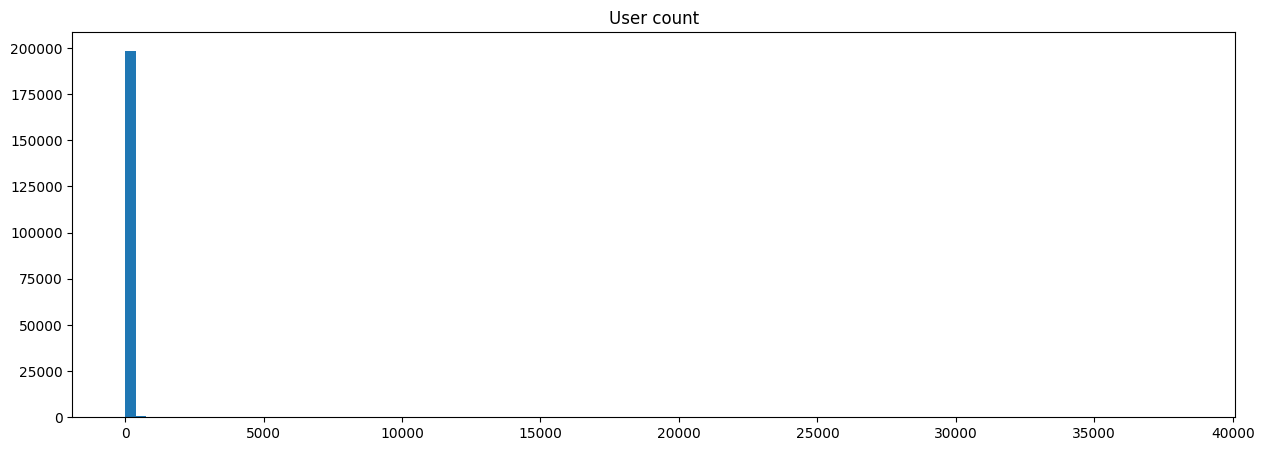

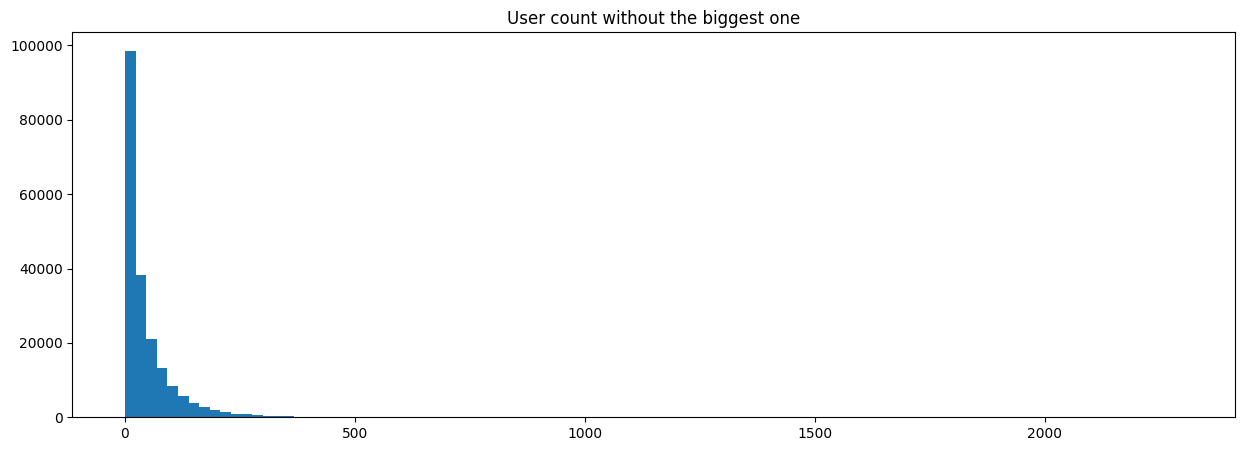

In [8]:
import matplotlib.pyplot as plt

def plot_hist(df, col, title):
    plt.figure(figsize=(15, 5))
    plt.hist(df[col], bins=100)
    plt.title(title)
    plt.show()
plot_hist(count, 'counts', 'User count')
plot_hist(count[1:], 'counts', 'User count without the biggest one')

In [9]:
count["counts"].mean()

46.47713296885188

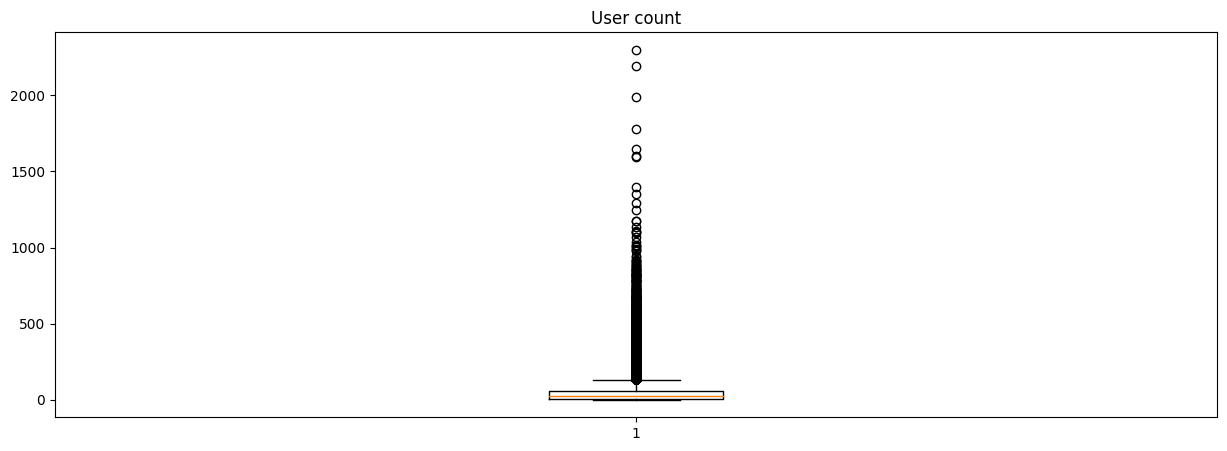

In [10]:
def boxplot(df, col, title):
    plt.figure(figsize=(15, 5))
    plt.boxplot(df[col])
    plt.title(title)
    plt.show()
boxplot(count[1:], 'counts', 'User count')

In [11]:
def concatenateColumns(df, columns):
    return df[columns].apply(lambda x: '|'.join(x.dropna().astype(str)), axis=1)
s_df.loc[:, "page"] = concatenateColumns(s_df, ['page_arbo_niveau_1', 'page_arbo_niveau_2', 'page_arbo_niveau_3'])

KeyboardInterrupt: 

In [12]:
s_df.head()

,platform,id_utilisateur,page,page_gabarit,page_arbo_niveau_1,page_arbo_niveau_2,page_arbo_niveau_3,heure_evenement,visites
0,NPC,86700-00000005634390,Mes_dossiers,fonctions_connectees_messagerie_securisee,banque-privee,operations,profil,2022-10-01 00:59:58.864,1.0
1,NPC,86700-00000050986900,Ma_synthese_de_comptes,fonctions_connectees_synthese_des_comptes,particulier,operations,synthese,2022-10-01 00:59:58.447,1.0
2,NPC,86700-00000050963995,Particulier,accueil_particuliers_et_BP,particulier,NaN,NaN,2022-10-01 00:59:58.378,1.0
3,NPC,86700-00000040994659,Acceder_a_mes_E_Documents_PU_,fonctions_connectees_pumigrees,particulier,operations,documents,2022-10-01 00:59:57.134,1.0
4,NPC,86700-00000005634390,Mes_dossiers,fonctions_connectees_messagerie_securisee,banque-privee,operations,profil,2022-10-01 00:59:56.799,1.0


In [13]:
df["platform"].unique()

array(['NPC'], dtype=object)

In [14]:
c_df = s_df[["id_utilisateur", "page", "page_gabarit", "heure_evenement"]]
c_df.head()

,id_utilisateur,page,page_gabarit,heure_evenement
0,86700-00000005634390,Mes_dossiers,fonctions_connectees_messagerie_securisee,2022-10-01 00:59:58.864
1,86700-00000050986900,Ma_synthese_de_comptes,fonctions_connectees_synthese_des_comptes,2022-10-01 00:59:58.447
2,86700-00000050963995,Particulier,accueil_particuliers_et_BP,2022-10-01 00:59:58.378
3,86700-00000040994659,Acceder_a_mes_E_Documents_PU_,fonctions_connectees_pumigrees,2022-10-01 00:59:57.134
4,86700-00000005634390,Mes_dossiers,fonctions_connectees_messagerie_securisee,2022-10-01 00:59:56.799


In [15]:
c_df = c_df.groupby(['id_utilisateur', 'page_gabarit']).size().reset_index(name='counts').sort_values(by=['id_utilisateur'], ascending=False)
c_df.head()

,id_utilisateur,page_gabarit,counts
1043203,86700-00000070999999,produit_fiche_produit_2,11
1043197,86700-00000070999999,conseil_univers_de_besoin,2
1043192,86700-00000070999999,Formulaire,1
1043193,86700-00000070999999,accueil_autres_marches,6
1043195,86700-00000070999999,avant_vente_simulation_devis_synthese,5


In [16]:
c_df.shape

(1043204, 3)

In [17]:
p_df = c_df.pivot_table(index='id_utilisateur', columns='page_gabarit', values='counts').fillna(0).reset_index()
p_df.head()

page_gabarit,id_utilisateur,DSP2_authent_securipass,DSP2_authent_sms,DSP2_authentification_success,DSP2_changement_numero_telephone_fiabilise,DSP2_choix_authentification_forte,DSP2_erreur_authentification_forte_certificat,DSP2_informations_authentification_forte,DSP2_informations_fiabilisation,Formulaire,...,societaires_formulaire,societaires_initiative_regionale,societaires_page_libre,store_locator_detail_agence,store_locator_index_CR,store_locator_index_agence,store_locator_index_ville,store_locator_trouver_ma_CR_50,store_locator_trouver_ma_CR_mon_agence,store_locator_trouver_une_agence
0,86700-00000000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,86700-00000000000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86700-00000000000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,86700-00000000000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,86700-00000000000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
p_df.head()

page_gabarit,id_utilisateur,DSP2_authent_securipass,DSP2_authent_sms,DSP2_authentification_success,DSP2_changement_numero_telephone_fiabilise,DSP2_choix_authentification_forte,DSP2_erreur_authentification_forte_certificat,DSP2_informations_authentification_forte,DSP2_informations_fiabilisation,Formulaire,...,societaires_formulaire,societaires_initiative_regionale,societaires_page_libre,store_locator_detail_agence,store_locator_index_CR,store_locator_index_agence,store_locator_index_ville,store_locator_trouver_ma_CR_50,store_locator_trouver_ma_CR_mon_agence,store_locator_trouver_une_agence
0,86700-00000000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,86700-00000000000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86700-00000000000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,86700-00000000000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,86700-00000000000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(p_df.drop(["id_utilisateur"], axis=1), p_df["id_utilisateur"], test_size=0.3, random_state=123)

In [20]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=9)

In [21]:
# Load the data in chunks, and update the model incrementally
chunk_size = 10000
for i in range(0, len(p_df), chunk_size):
    X = p_df.drop(["id_utilisateur"], axis=1)[i:i+chunk_size]
    brc.partial_fit(X)

# Once all data is processed, make predictions using the trained model
labels = brc.predict(p_df.drop(["id_utilisateur"], axis=1))

In [ ]:
brc.fit(p_df.drop(["id_utilisateur"], axis=1))

Birch(n_clusters=9)

In [ ]:
predict = brc.predict(p_df.drop(["id_utilisateur"], axis=1))

In [ ]:
predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
with open('tmp.txt', 'w') as f:
    f.write(labels)

In [ ]:
# perform pca on a dataframe
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(p_df.drop(["id_utilisateur"], axis=1))
pca_df = pca.transform(p_df.drop(["id_utilisateur"], axis=1))

In [ ]:
pca_df

array([[-0.40846545, -0.5872303 ],
       [-1.89487334,  0.91009535],
       [ 0.26690847, -1.34910087],
       ...,
       [-1.45357273,  0.25000079],
       [-0.40846545, -0.5872303 ],
       [-0.29076169, -0.92193672]])

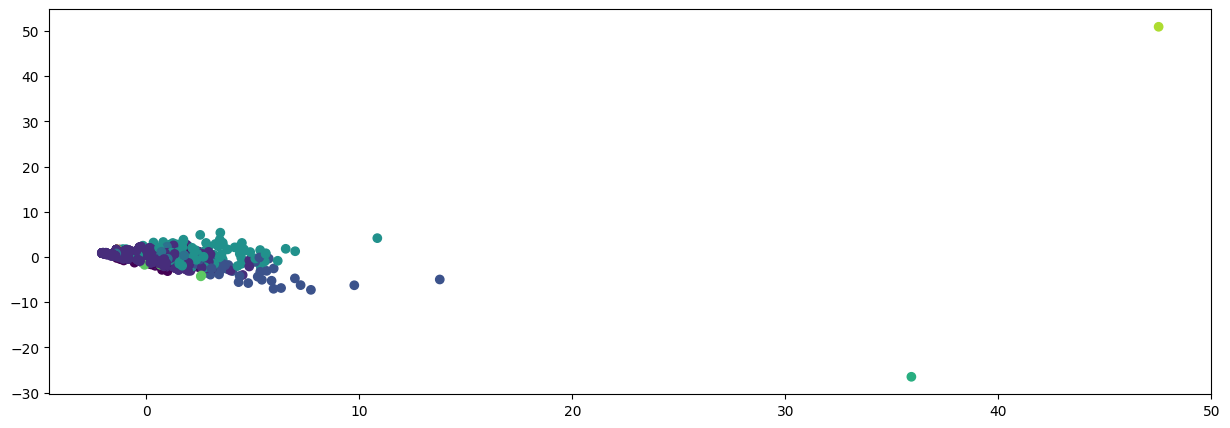

In [ ]:
import matplotlib.pyplot as plt
# Plot the prediction with colors
plt.figure(figsize=(15, 5))
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=predict)
plt.show()

In [ ]:
# Import libraries
import plotly.express as px
import pandas as pd

pca3 = PCA(n_components=3)
pca3.fit(p_df.drop(["id_utilisateur"], axis=1))
pca3_df = pca3.transform(p_df.drop(["id_utilisateur"], axis=1))

fig = px.scatter_3d(x=pca3_df[:,0], y=pca3_df[:,1], z=pca3_df[:,2], color=predict,
                    title='3D Scatter Plot')
# Show plot
fig.show()